# Report Figs

## 4.1 EU-ETS Data Description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1071 non-null   datetime64[ns]
 1   Cprice      1071 non-null   float64       
 2   Eprice      1071 non-null   float64       
 3   BrentOil    1071 non-null   float64       
 4   CrudeOilF   1071 non-null   float64       
 5   TTF-NatGas  1071 non-null   float64       
 6   NatGasF     1071 non-null   float64       
 7   Coal        1071 non-null   float64       
 8   GasolineF   1071 non-null   float64       
 9   DJI         1071 non-null   float64       
 10  S&P500      1071 non-null   float64       
 11  USD-EUR     1071 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 100.5 KB
None
        Date  Cprice     Eprice  BrentOil  CrudeOilF  TTF-NatGas  NatGasF  \
0 2018-07-09   15.85  50.688929     78.07      73.85      22.730    2.828   


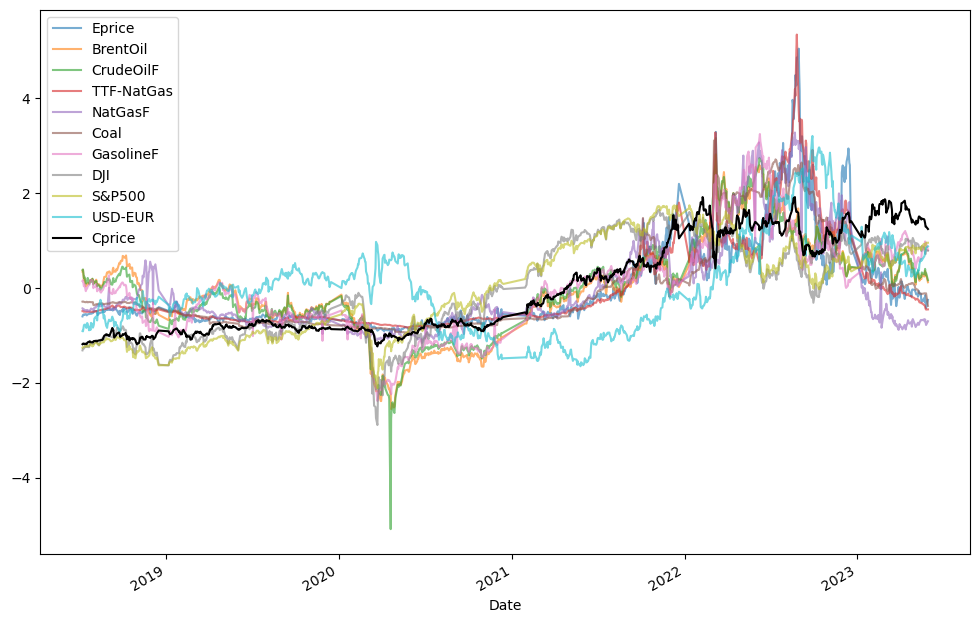

In [1]:
from Preprocess import *

import warnings
warnings.simplefilter(action='ignore')
df_eu = prepare_eu(save=False, vis=True)

(800,)


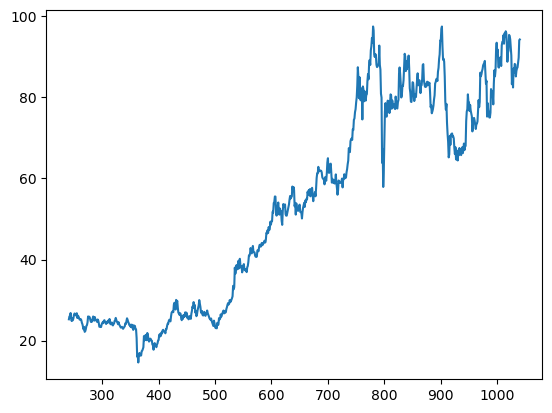

In [2]:
df_eu1 = df_eu[ (df_eu['Date'] >= pd.to_datetime('20190825')) & (df_eu['Date'] <= pd.to_datetime('20230410')) ]
df_eu1['Cprice'].plot()
print(df_eu1['Cprice'].shape)


<AxesSubplot:>

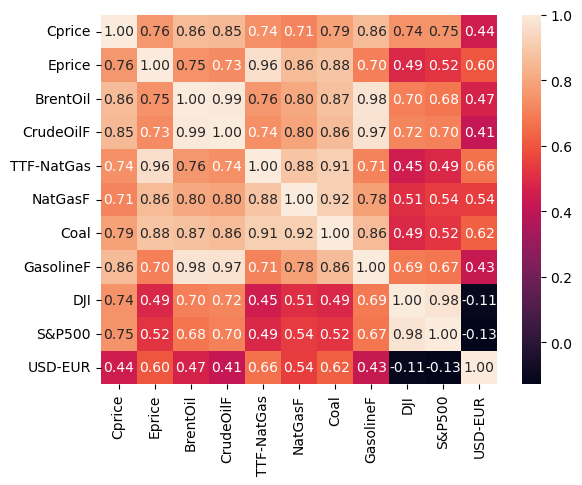

In [3]:
import seaborn as sns
sns.heatmap(df_eu1.corr(), annot=True, fmt=".2f")

## 4.3 SVR example

In [8]:
from pred_report import *
from forecasting_methods import *

from Preprocess import *

import warnings
warnings.simplefilter(action='ignore')
df_eu = prepare_eu(save=False, vis=False)
df_eu1 = df_eu[ (df_eu['Date'] >= pd.to_datetime('20190825')) & (df_eu['Date'] <= pd.to_datetime('20230410')) ]

cols = ['Cprice', 'Eprice', 'BrentOil', 'CrudeOilF', 'TTF-NatGas', 'NatGasF', 'Coal', 'GasolineF', 'DJI', 'S&P500', 'USD-EUR']
data = np.array(df_eu1[cols])
ml_x, ml_y = ml_prepare_data(data)


In [5]:
train_ratio = 0.9
split = int(len(ml_y)*train_ratio)
real = np.zeros(ml_y.shape)
pred = np.zeros(ml_y.shape)

# predict each step (each y in ml_y)
for i in [0,9]:
    x, y = ml_x, ml_y[:,i]
    scalarX, scalarY = StandardScaler(), StandardScaler()
    x = scalarX.fit_transform(x)
    y = scalarY.fit_transform(y.reshape(-1,1)).reshape(-1)
    train_x, test_x = x[:split], x[split:]
    train_y, test_y = y[:split], y[split:]

    clf = SVR( kernel='linear', C=0.1 ) # baseline
    print(clf.get_params())
    clf.fit(x, y)

    # make predictions on the test set
    test_p = clf.predict(x)
    pred[:,i] = scalarY.inverse_transform(test_p.reshape(-1,1)).reshape(-1)
    real[:,i] = scalarY.inverse_transform(y.reshape(-1,1)).reshape(-1)


{'C': 0.1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 0.1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


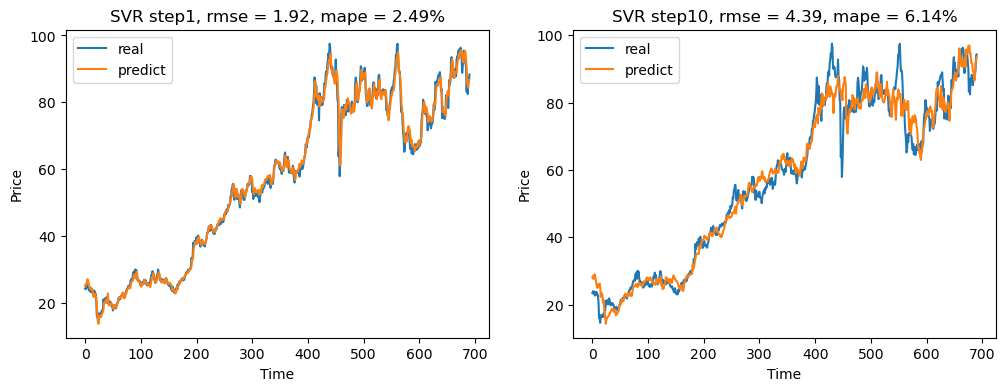

In [6]:
from utils import *

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(real[:,0], label="real")
plt.plot(pred[:,0], label="predict")
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(loc='best')
plt.title('SVR step1, rmse = %.2f, mape = %.2f%%' %(cal_rmse(real[:,0], pred[:,0]), cal_mape(real[:,0], pred[:,0])))
plt.subplot(122)
plt.plot(real[:,9], label="real")
plt.plot(pred[:,9], label="predict")
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(loc='best')
plt.title('SVR step10, rmse = %.2f, mape = %.2f%%' %(cal_rmse(real[:,9], pred[:,9]), cal_mape(real[:,9], pred[:,9])))
plt.show()


## 4.5 Adaptability

c:\Anaconda3\envs\torch37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


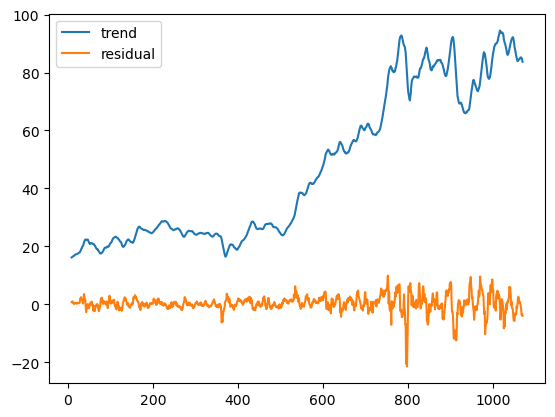

In [1]:
from pred_report import *
from forecasting_methods import *
from utils import *

data = loaddata_eu()
dataX = data[:,1:]
dataY = data[:,0].reshape(-1,1)

n_roll = 10
trendY = pd.DataFrame(dataY).rolling(n_roll).mean()
residY = dataY - trendY
plt.plot(trendY, label='trend')
plt.plot(residY, label='residual')
plt.legend()

trendY = np.array(trendY)[n_roll-1:]
residY = np.array(residY)[n_roll-1:]
trendData = np.concatenate((trendY, dataX[n_roll-1:]), axis=1)
residData = np.concatenate((residY, dataX[n_roll-1:]), axis=1)

In [2]:
ada_result = {}

model tcn loaded from file
test_loss 0.01501058
performance of tcn
col 0: RMSE=1.07, MAPE=2.18%
col 1: RMSE=1.51, MAPE=2.53%
col 2: RMSE=2.01, MAPE=2.88%
col 3: RMSE=2.48, MAPE=3.26%
col 4: RMSE=2.95, MAPE=3.63%
col 5: RMSE=3.37, MAPE=3.99%
col 6: RMSE=3.74, MAPE=4.29%
col 7: RMSE=4.04, MAPE=4.58%
col 8: RMSE=4.30, MAPE=4.85%
col 9: RMSE=4.48, MAPE=5.09%


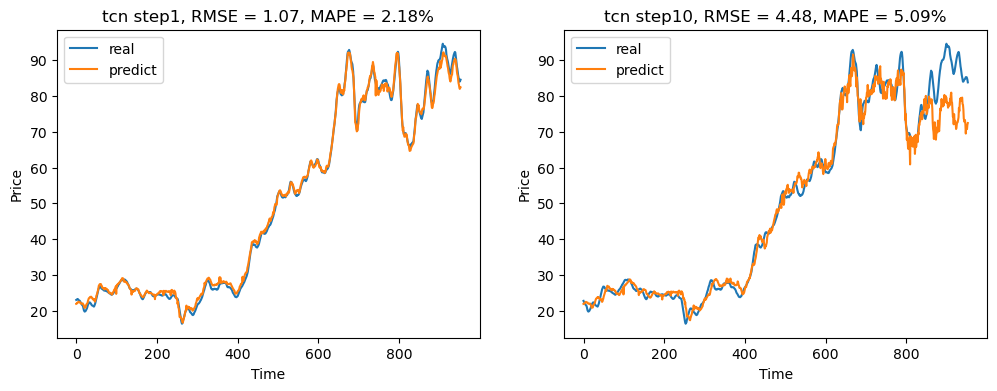

In [13]:
# predict trendY
method = 'tcn'
with HiddenPrints():
    pred, real = series_pred_func(trendData, method, method)
ada_result['trend_'+method+'_pred'] = pred
ada_result['trend_'+method+'_real'] = real
show_performance(method, pred, real, False)
show_2_performance(method, pred, real)

100%|██████████| 96/96 [00:09<00:00, 10.38it/s]


performance of arima
col 0: RMSE=0.32, MAPE=0.29%
col 1: RMSE=0.65, MAPE=0.61%
col 2: RMSE=1.06, MAPE=0.98%
col 3: RMSE=1.53, MAPE=1.39%
col 4: RMSE=2.00, MAPE=1.86%
col 5: RMSE=2.48, MAPE=2.34%
col 6: RMSE=2.98, MAPE=2.82%
col 7: RMSE=3.48, MAPE=3.28%
col 8: RMSE=3.98, MAPE=3.76%
col 9: RMSE=4.48, MAPE=4.24%


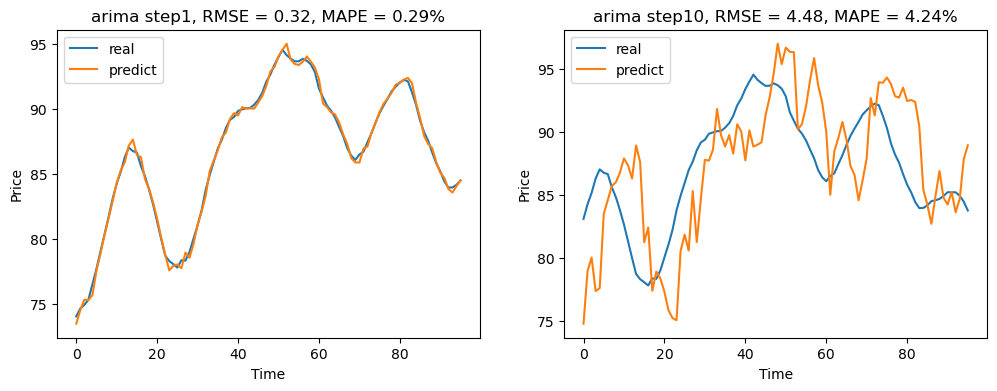

In [5]:
# predict trendY
method = 'arima'
pred, real = series_pred_func(trendData, method, method)
ada_result['trend_'+method+'_pred'] = pred
ada_result['trend_'+method+'_real'] = real
show_performance(method, pred, real, False)
show_2_performance(method, pred, real)

100%|██████████| 10/10 [00:00<00:00, 28.16it/s]


performance of svr
col 0: RMSE=2.10, MAPE=2.18%
col 1: RMSE=2.08, MAPE=2.12%
col 2: RMSE=2.68, MAPE=2.70%
col 3: RMSE=3.21, MAPE=3.24%
col 4: RMSE=3.76, MAPE=3.81%
col 5: RMSE=3.88, MAPE=3.90%
col 6: RMSE=4.31, MAPE=4.33%
col 7: RMSE=4.59, MAPE=4.55%
col 8: RMSE=5.24, MAPE=5.13%
col 9: RMSE=5.53, MAPE=5.30%


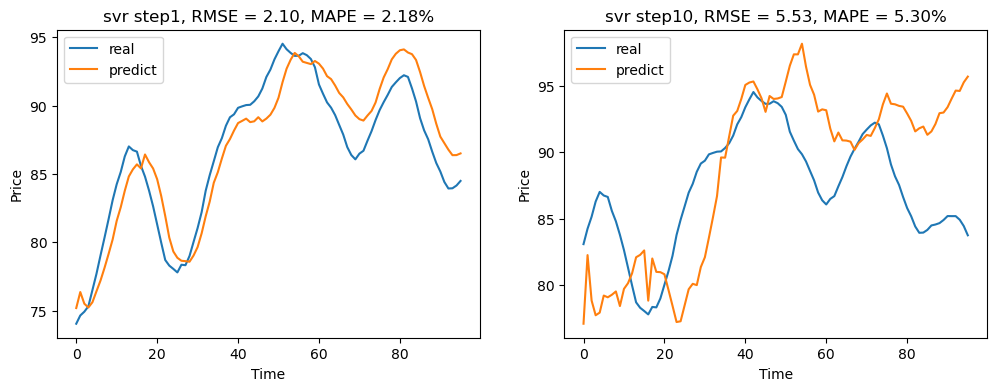

In [6]:
# predict trendY
method = 'svr'
pred, real = series_pred_func(trendData, method, method)
ada_result['trend_'+method+'_pred'] = pred
ada_result['trend_'+method+'_real'] = real
show_performance(method, pred, real, False)
show_2_performance(method, pred, real)

performance of tcn
col 0: RMSE=2.45, MAPE=182.36%
col 1: RMSE=2.96, MAPE=231.93%
col 2: RMSE=3.31, MAPE=242.13%
col 3: RMSE=3.64, MAPE=283.85%
col 4: RMSE=3.79, MAPE=3307.61%
col 5: RMSE=4.05, MAPE=3285.47%
col 6: RMSE=4.10, MAPE=2877.87%
col 7: RMSE=4.38, MAPE=3019.00%
col 8: RMSE=4.63, MAPE=3367.99%
col 9: RMSE=4.73, MAPE=4001.59%


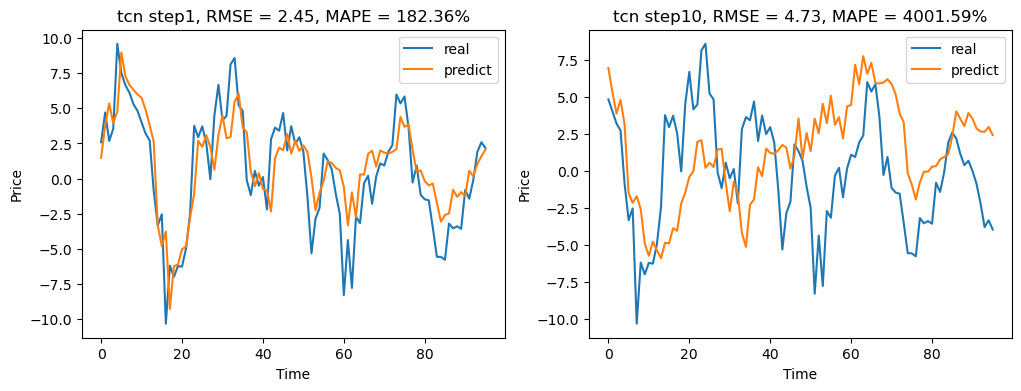

In [9]:
# predict residY
method = 'tcn'
with HiddenPrints():
    pred, real = series_pred_func(residData, method, method)
ada_result['resid_'+method+'_pred'] = pred
ada_result['resid_'+method+'_real'] = real
show_performance(method, pred, real, False)
show_2_performance(method, pred, real)

100%|██████████| 96/96 [00:06<00:00, 14.30it/s]


performance of arima
col 0: RMSE=2.29, MAPE=192.64%
col 1: RMSE=2.84, MAPE=234.37%
col 2: RMSE=3.33, MAPE=291.98%
col 3: RMSE=3.63, MAPE=291.20%
col 4: RMSE=3.74, MAPE=1581.15%
col 5: RMSE=3.72, MAPE=1304.36%
col 6: RMSE=3.72, MAPE=700.56%
col 7: RMSE=3.68, MAPE=663.18%
col 8: RMSE=3.65, MAPE=743.23%
col 9: RMSE=3.63, MAPE=748.06%


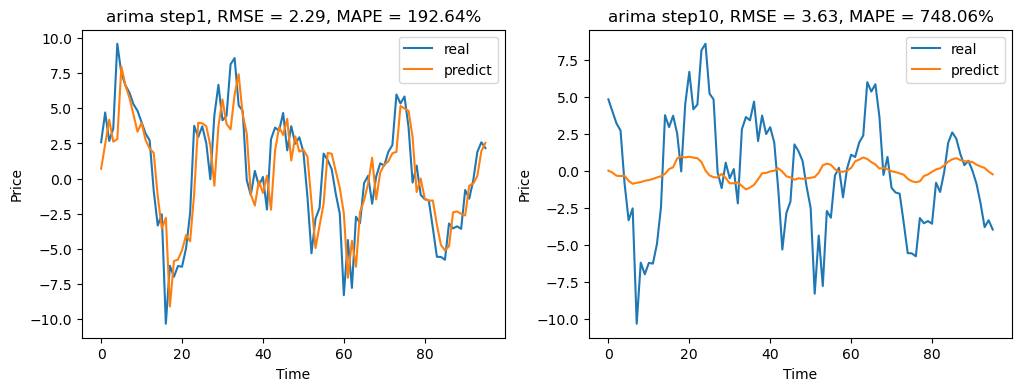

In [10]:
# predict residY
method = 'arima'
pred, real = series_pred_func(residData, method, method)
ada_result['resid_'+method+'_pred'] = pred
ada_result['resid_'+method+'_real'] = real
show_performance(method, pred, real, False)
show_2_performance(method, pred, real)

100%|██████████| 10/10 [00:01<00:00,  6.22it/s]


performance of svr
col 0: RMSE=2.20, MAPE=170.45%
col 1: RMSE=2.80, MAPE=187.82%
col 2: RMSE=3.11, MAPE=221.07%
col 3: RMSE=3.42, MAPE=272.87%
col 4: RMSE=3.56, MAPE=6711.14%
col 5: RMSE=3.49, MAPE=5596.76%
col 6: RMSE=3.53, MAPE=6058.56%
col 7: RMSE=3.55, MAPE=5913.61%
col 8: RMSE=3.48, MAPE=5334.93%
col 9: RMSE=3.48, MAPE=4628.44%


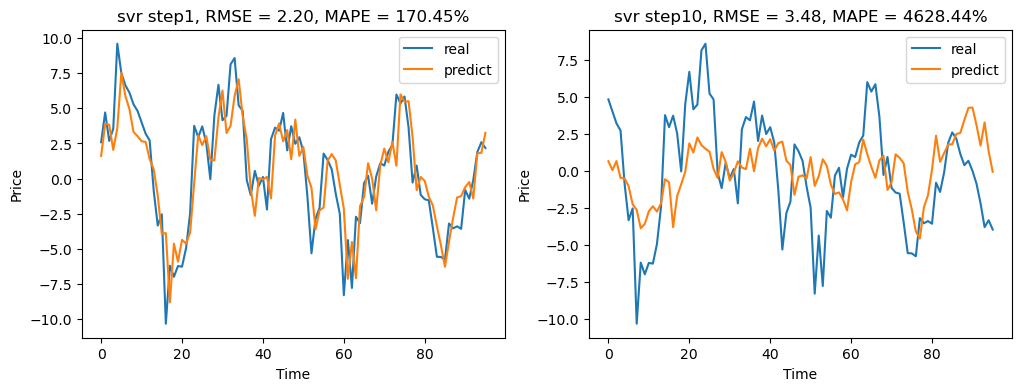

In [11]:
# predict residY
method = 'svr'
pred, real = series_pred_func(residData, method, method)
ada_result['resid_'+method+'_pred'] = pred
ada_result['resid_'+method+'_real'] = real
show_performance(method, pred, real, False)
show_2_performance(method, pred, real)

In [15]:
df = pd.DataFrame()
for component in ['trend', 'resid']:
    for i in range(10):
        df[component+'-real-'+str(i)] = ada_result[component+'_arima_real'][:,i]
        for method in ['arima', 'svr', 'tcn']:
            df[component+'-'+method+'-'+str(i)] = ada_result[component+'_'+method+'_pred'][:,i]

metrics = dict()
for i in range(10):
    for component in ['trend', 'resid']:
        for method in ['arima', 'svr', 'tcn']:
            if component+'-'+method+'-RMSE' not in metrics.keys():
                metrics[component+'-'+method+'-RMSE'] = []
            if component+'-'+method+'-MAPE' not in metrics.keys():
                metrics[component+'-'+method+'-MAPE'] = []
            metrics[component+'-'+method+'-RMSE'].append(cal_rmse(ada_result[component+'_'+method+'_real'][:,i], ada_result[component+'_'+method+'_pred'][:,i]))
            metrics[component+'-'+method+'-MAPE'].append(cal_mape(ada_result[component+'_'+method+'_real'][:,i], ada_result[component+'_'+method+'_pred'][:,i]))

writer = pd.ExcelWriter('res/res.xlsx', engine='openpyxl')
pd.DataFrame(metrics).to_excel(writer, sheet_name='metrics')
df.to_excel(writer, sheet_name='adaptability')
writer.save()
writer.close()

In [8]:
import openpyxl
import numpy as np
import pandas as pd

result = dict([ ('step'+str(i), {'real':None}) for i in range(10)])
wb = openpyxl.load_workbook('res/result_report_EU.xlsx')
for sheet in wb.worksheets:
    if sheet.title == 'Sheet1':
        continue
    table = []
    for row in sheet.rows:
        row_list = []
        for cell in row:
            row_list.append(cell.value)
        table.append(row_list)
    table = np.array(table)
    table = table[1:,1:]
    for i in range(10):
        title_split = sheet.title.split('-')
        if title_split[-1] == 'real':
            title = 'real'
        else:
            title = '-'.join(list(sheet.title.split('-')[2:-1]))
        result['step'+str(i)][title] = table[:,i]

from utils import *
methods = list(result['step0'].keys())[1:]
metrics = dict()
for m in methods:
    metrics[m+'-RMSE'] = []
    metrics[m+'-MAPE'] = []
    for step in result.keys():
        metrics[m+'-RMSE'].append(cal_rmse(result[step]['real'], result[step][m]))
        metrics[m+'-MAPE'].append(cal_mape(result[step]['real'], result[step][m]))

writer = pd.ExcelWriter('res/res.xlsx', engine='openpyxl')
pd.DataFrame(metrics).to_excel(writer, sheet_name='metrics')
for i in result.keys():
    pd.DataFrame(result[i]).to_excel(writer, sheet_name=i)
writer.save()
writer.close()

dict_keys(['trend_arima_pred', 'trend_arima_real', 'trend_svr_pred', 'trend_svr_real', 'resid_arima_pred', 'resid_arima_real', 'resid_svr_pred', 'resid_svr_real'])

In [1]:
import matplotlib.pyplot as plt
from torchinfo import summary

from pred_report import *
from forecasting_methods import *

data = loaddata_eu()
dataX = data[:,1:]
dataY = data[:,0].reshape(-1,1)
ml_x, ml_y = ml_prepare_data(data, seq_len=100, pred_len=10)

c:\Anaconda3\envs\torch37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(800,)

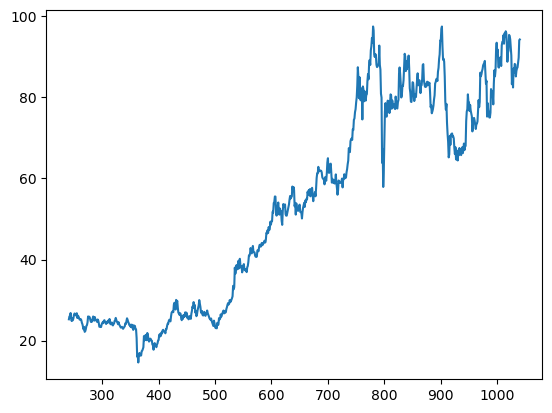

In [9]:
df_eu['Cprice'].shape

(797,)

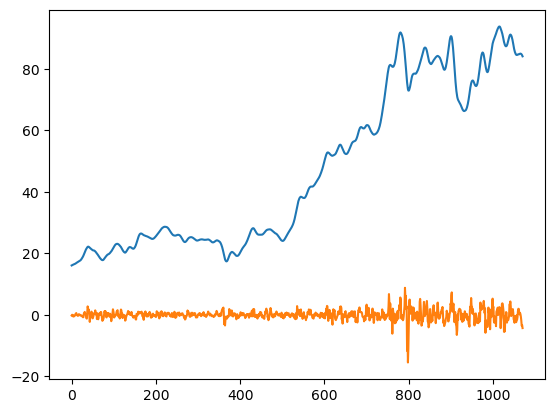

In [12]:
reconstr = series_restr_func(dataY, 'ssa', n_integr=2)
plt.plot(reconstr[0])
plt.plot(reconstr[1])

In [13]:
i = 1
subY = reconstr[i,:].reshape(-1,1)
subData = np.concatenate((subY, dataX), axis=1)

100%|██████████| 10/10 [00:02<00:00,  4.54it/s]

2.0246848139374123
134.67536257238913


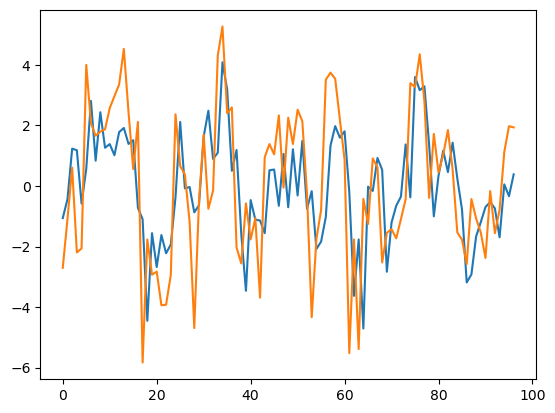

In [14]:
method = 'svr'
sub_pred, sub_real = series_pred_func(subData, method, method, batch_size, seq_len, pred_len, train_ratio)
plt.plot(sub_pred[:,0])
plt.plot(sub_real[:,0])
print(cal_rmse(sub_real[:,0],sub_pred[:,0]))
print(cal_mape(sub_real[:,0],sub_pred[:,0]))

100%|██████████| 97/97 [00:28<00:00,  3.39it/s]

2.3437263669309862
187.90119378707757


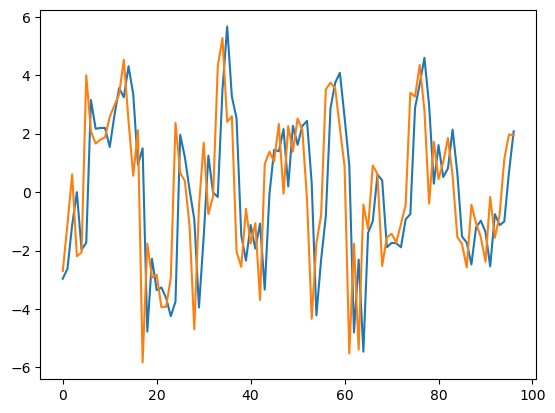

In [16]:
method = 'arima'
sub_pred, sub_real = series_pred_func(subData, method, method, batch_size, seq_len, pred_len, train_ratio)
plt.plot(sub_pred[:,0])
plt.plot(sub_real[:,0])
print(cal_rmse(sub_real[:,0],sub_pred[:,0]))
print(cal_mape(sub_real[:,0],sub_pred[:,0]))

epoch 001 train_loss 1.18922653 val_loss 0.93852960
epoch 002 train_loss 1.01870538 val_loss 0.89252884
epoch 003 train_loss 0.96777021 val_loss 0.86657317
epoch 004 train_loss 0.94761410 val_loss 0.84671064
epoch 005 train_loss 0.91690927 val_loss 0.83828584
epoch 006 train_loss 0.90504413 val_loss 0.82949171
epoch 007 train_loss 0.88701679 val_loss 0.82993658
EarlyStopping counter: 1 out of 7
epoch 008 train_loss 0.88989793 val_loss 0.82751699
epoch 009 train_loss 0.87031338 val_loss 0.82282088
epoch 010 train_loss 0.87912753 val_loss 0.82766415
EarlyStopping counter: 1 out of 7
epoch 011 train_loss 0.87116824 val_loss 0.81823959
epoch 012 train_loss 0.87760716 val_loss 0.81762077
epoch 013 train_loss 0.85764767 val_loss 0.82010674
EarlyStopping counter: 1 out of 7
epoch 014 train_loss 0.84932930 val_loss 0.81520664
epoch 015 train_loss 0.84837754 val_loss 0.81810627
EarlyStopping counter: 1 out of 7
epoch 016 train_loss 0.84919330 val_loss 0.80712706
epoch 017 train_loss 0.84773884 

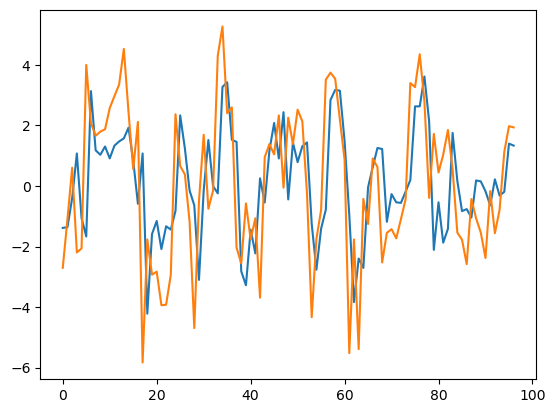

In [17]:
method = 'tcn'
sub_pred, sub_real = series_pred_func(subData, method, method, batch_size, seq_len, pred_len, train_ratio)
plt.plot(sub_pred[:,0])
plt.plot(sub_real[:,0])
print(cal_rmse(sub_real[:,0],sub_pred[:,0]))
print(cal_mape(sub_real[:,0],sub_pred[:,0]))

In [ ]:
param_grid = {
    'kernel': ['rbf', 'linear'], 
    'C': [pow(10,i) for i in range(-1,2)],
}

grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', verbose=5, n_jobs=-1)
grid_search.fit(x_tran, y_tran)
best_params = grid_search.best_estimator_.get_params()
print(grid_search.best_estimator_)

# random_search = RandomizedSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', verbose=5, n_jobs=-1)
# random_search.fit(x_tran, y_tran)
# best_params = random_search.best_estimator_.get_params()
# print(random_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVR(C=0.1, kernel='linear')


In [51]:
import matplotlib.pyplot as plt
from torchinfo import summary

from pred_report import *
from forecasting_methods import *

data = loaddata_eu()

dataX = data[:,1:]
dataY = data[:,0].reshape(-1,1)
reconstr = series_restr_func(dataY, decomp_method='ceemdan', n_integr=2)

In [5]:
i=0
subY = reconstr[i,:].reshape(-1,1)
_, not_stationary = pm.arima.ADFTest().should_diff(subY)
print(not_stationary)
subData = np.concatenate((subY, dataX), axis=1)


False


100%|██████████| 120/120 [00:25<00:00,  4.66it/s]


performance of arima
col 0: RMSE=2.09, MAPE=147.10%
col 1: RMSE=2.91, MAPE=230.61%
col 2: RMSE=3.81, MAPE=345.61%
col 3: RMSE=4.56, MAPE=453.67%
col 4: RMSE=5.19, MAPE=555.11%
col 5: RMSE=5.78, MAPE=694.37%
col 6: RMSE=6.41, MAPE=607.41%
col 7: RMSE=7.08, MAPE=1044.02%
col 8: RMSE=7.76, MAPE=1316.92%
col 9: RMSE=8.52, MAPE=1599.76%


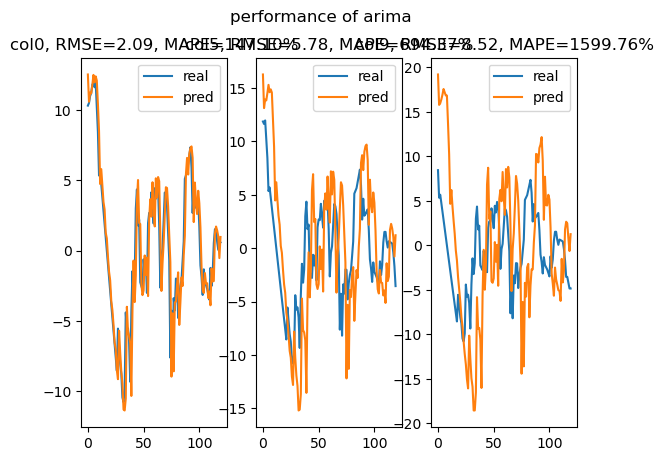

In [6]:
sub_pred, sub_real = series_pred_func(subData, 'arima','arima')
show_performance('arima', sub_pred, sub_real, vis=True)

100%|██████████| 10/10 [00:02<00:00,  4.90it/s]


performance of svr
col 0: RMSE=2.00, MAPE=162.01%
col 1: RMSE=2.64, MAPE=256.79%
col 2: RMSE=3.39, MAPE=296.39%
col 3: RMSE=3.68, MAPE=311.36%
col 4: RMSE=3.75, MAPE=292.21%
col 5: RMSE=3.85, MAPE=292.31%
col 6: RMSE=3.95, MAPE=287.77%
col 7: RMSE=4.00, MAPE=241.78%
col 8: RMSE=3.95, MAPE=284.93%
col 9: RMSE=4.00, MAPE=324.90%


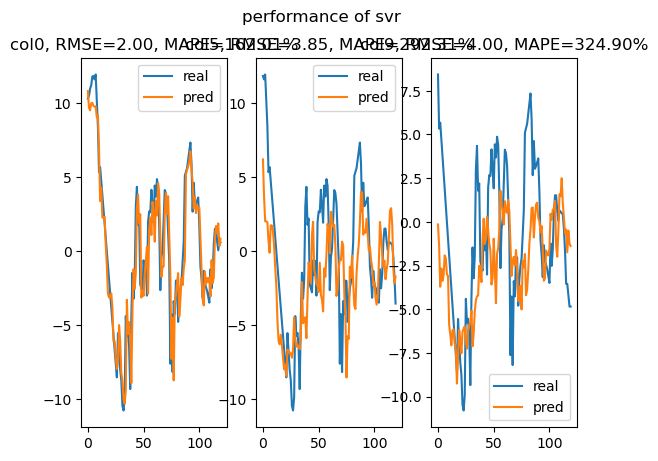

In [7]:
sub_pred, sub_real = series_pred_func(subData, 'svr','svr')
show_performance('svr', sub_pred, sub_real, vis=True)

hb_ceemdan_arima_svr
subseq0: high-freq forecast with arima...


100%|██████████| 120/120 [00:26<00:00,  4.50it/s]


subseq1: high-freq forecast with arima...


100%|██████████| 120/120 [00:37<00:00,  3.23it/s]


subseq2: low-freq forecast with svr...


100%|██████████| 10/10 [00:00<00:00, 67.55it/s]


performance of hb_ceemdan_arima_svr
col 0: RMSE=3.42, MAPE=3.40%
col 1: RMSE=3.67, MAPE=3.60%
col 2: RMSE=3.95, MAPE=3.98%
col 3: RMSE=4.05, MAPE=4.13%
col 4: RMSE=4.07, MAPE=4.09%
col 5: RMSE=4.27, MAPE=4.21%
col 6: RMSE=4.67, MAPE=4.65%
col 7: RMSE=5.06, MAPE=4.93%
col 8: RMSE=5.75, MAPE=5.64%
col 9: RMSE=6.43, MAPE=6.26%


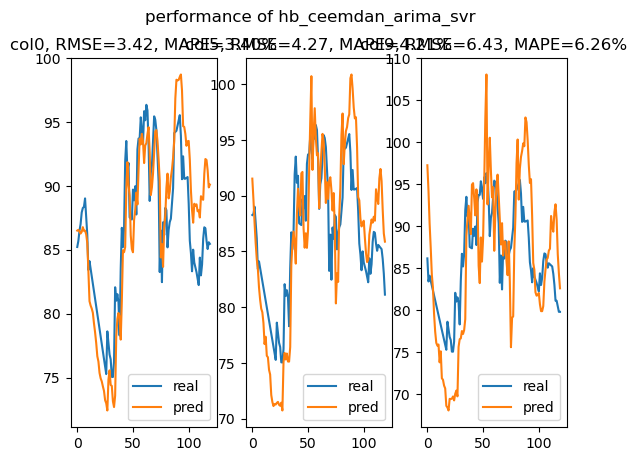

In [8]:
pred_nowin_hybrid(data, 'ceemdan', 'arima', 'svr', True)

hb_ceemdan_svr_arima
subseq0: high-freq forecast with svr...


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


subseq1: high-freq forecast with svr...


100%|██████████| 10/10 [00:01<00:00,  6.49it/s]


subseq2: low-freq forecast with arima...


100%|██████████| 120/120 [02:01<00:00,  1.01s/it]


performance of hb_ceemdan_svr_arima
col 0: RMSE=1.53, MAPE=1.31%
col 1: RMSE=1.67, MAPE=1.47%
col 2: RMSE=1.86, MAPE=1.59%
col 3: RMSE=2.24, MAPE=1.99%
col 4: RMSE=2.80, MAPE=2.61%
col 5: RMSE=3.38, MAPE=3.19%
col 6: RMSE=3.78, MAPE=3.54%
col 7: RMSE=4.15, MAPE=3.84%
col 8: RMSE=4.42, MAPE=4.07%
col 9: RMSE=4.57, MAPE=4.20%


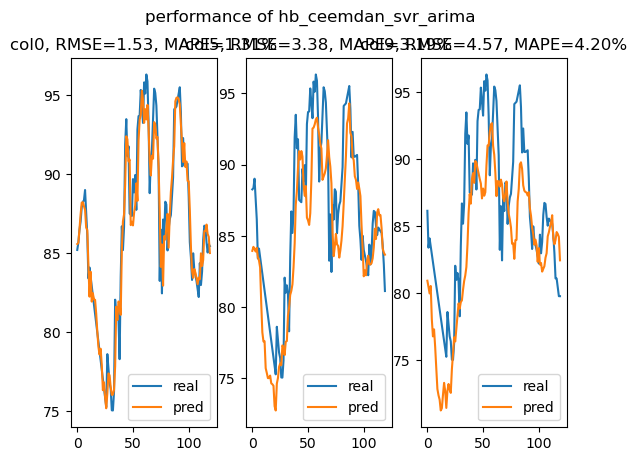

In [9]:
pred_nowin_hybrid(data, 'ceemdan', 'svr', 'arima', True)

hb_ssa_svr_svr
subseq0: low-freq forecast with svr...


100%|██████████| 10/10 [00:00<00:00, 23.88it/s]


subseq1: high-freq forecast with svr...


100%|██████████| 10/10 [00:01<00:00,  5.40it/s]


subseq2: high-freq forecast with svr...


100%|██████████| 10/10 [00:02<00:00,  4.34it/s]


performance of hb_ssa_svr_svr
col 0: RMSE=2.08, MAPE=2.01%
col 1: RMSE=2.36, MAPE=2.15%
col 2: RMSE=2.34, MAPE=2.12%
col 3: RMSE=2.49, MAPE=2.26%
col 4: RMSE=2.81, MAPE=2.42%
col 5: RMSE=3.01, MAPE=2.66%
col 6: RMSE=3.45, MAPE=3.15%
col 7: RMSE=3.92, MAPE=3.58%
col 8: RMSE=4.56, MAPE=4.21%
col 9: RMSE=5.24, MAPE=4.86%


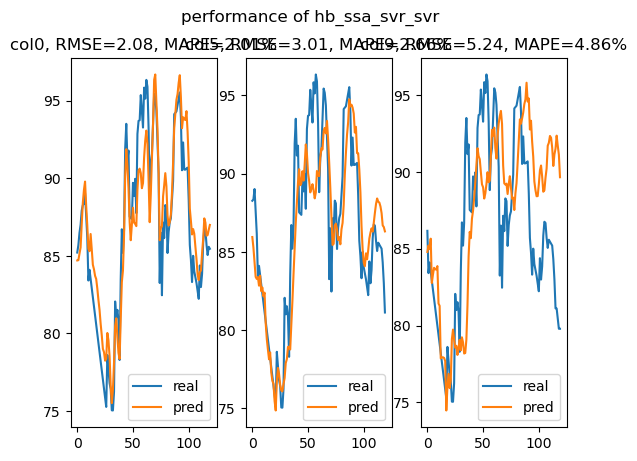

In [4]:
pred_nowin_hybrid(data, 'ssa', 'svr', 'svr', True)

hb_ssa_arima_arima
subseq0: low-freq forecast with arima...


100%|██████████| 120/120 [00:11<00:00, 10.83it/s]


subseq1: high-freq forecast with arima...


100%|██████████| 120/120 [00:08<00:00, 13.35it/s]


subseq2: high-freq forecast with arima...


100%|██████████| 120/120 [00:21<00:00,  5.65it/s]


performance of hb_ssa_arima_arima
col 0: RMSE=0.68, MAPE=0.59%
col 1: RMSE=1.04, MAPE=0.89%
col 2: RMSE=1.28, MAPE=1.15%
col 3: RMSE=1.59, MAPE=1.40%
col 4: RMSE=1.93, MAPE=1.72%
col 5: RMSE=2.02, MAPE=1.82%
col 6: RMSE=1.99, MAPE=1.85%
col 7: RMSE=2.07, MAPE=1.79%
col 8: RMSE=2.12, MAPE=1.96%
col 9: RMSE=2.71, MAPE=2.45%


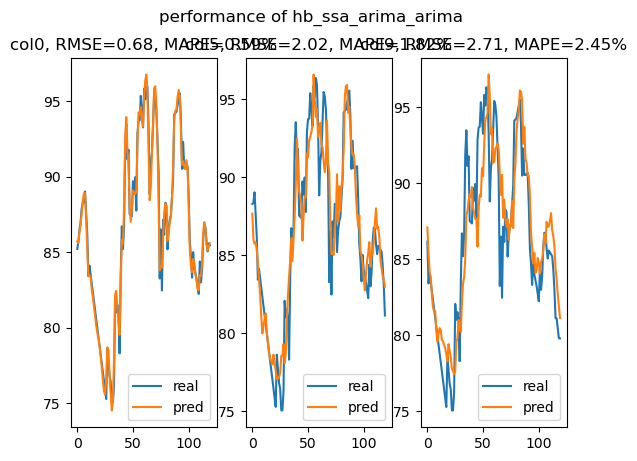

In [5]:
pred_nowin_hybrid(data, 'ssa', 'arima', 'arima', True)

100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


[0.81828521 0.72396446 0.65675735 0.60680499 0.57542151 0.54998215
 0.533801   0.52103859 0.50940876 0.50249029]
performance of svr
col 0: RMSE=2.47, MAPE=2.22%
col 1: RMSE=3.31, MAPE=3.10%
col 2: RMSE=3.90, MAPE=3.70%
col 3: RMSE=4.27, MAPE=4.10%
col 4: RMSE=4.90, MAPE=4.80%
col 5: RMSE=5.46, MAPE=5.26%
col 6: RMSE=5.55, MAPE=5.27%
col 7: RMSE=6.24, MAPE=5.99%
col 8: RMSE=6.65, MAPE=6.39%
col 9: RMSE=7.22, MAPE=6.79%


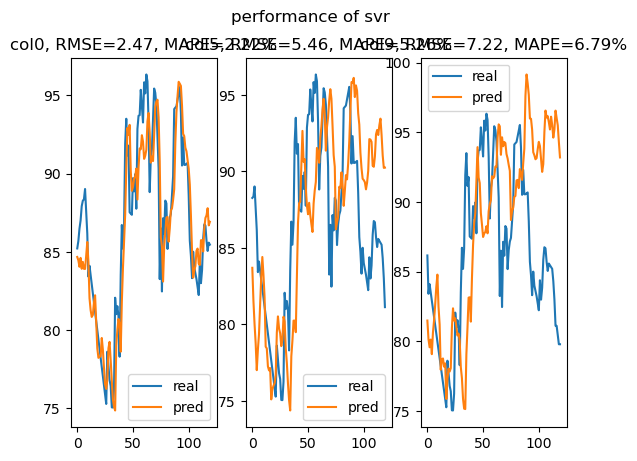

In [6]:
ml_x, ml_y = ml_prepare_data(data, seq_len=100, pred_len=10)
pred_svr, real_svr, score_svr = pred_svr(ml_x, ml_y, train_ratio=0.9, auto=False)
print(score_svr)
show_performance('svr', pred_svr, real_svr, vis=True)

In [11]:
# reconstr = restr_ssa(dataY.reshape(-1), n_decomp=10, n_integr=2, vis=True)

In [12]:
# # Now plot the results and the forecast for the test set
# preds, conf_int = model.predict(n_periods=testY.shape[0],
#                                 return_conf_int=True)

# plotTrain = 100

# fig, axes = plt.subplots(2, 1, figsize=(12, 8))
# x_axis = np.arange(trainY.shape[0] + preds.shape[0])
# axes[0].set_title("Train samples & forecasted test samples")
# axes[0].plot(x_axis[:trainY.shape[0]], trainY, alpha=0.75)
# axes[0].scatter(x_axis[trainY.shape[0]:], preds, alpha=0.4, marker='o')
# axes[0].scatter(x_axis[trainY.shape[0]:], testY, alpha=0.4, marker='x')
# axes[0].fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1],
#                      alpha=0.1, color='b')



# # Now add the actual samples to the model and create NEW forecasts
# model.update(testY)
# new_preds, new_conf_int = model.predict(n_periods=10, return_conf_int=True)
# new_x_axis = np.arange(data.shape[0] + 10)

# axes[1].plot(new_x_axis[:data.shape[0]], data, alpha=0.75)
# axes[1].scatter(new_x_axis[data.shape[0]:], new_preds, alpha=0.4, marker='o')
# axes[1].fill_between(new_x_axis[-new_preds.shape[0]:],
#                      new_conf_int[:, 0],
#                      new_conf_int[:, 1],
#                      alpha=0.1, color='g')
# axes[1].set_title("Added new observed values with new forecasts")
# plt.show()

In [3]:

arima_pred, real = pred_nowin_single('arima', data, vis=False)
svr_pred, real = pred_nowin_single('svr', data, vis=False)
tcn_pred, real = pred_nowin_single('tcn', data, vis=False)

sg_nowin_arima


100%|██████████| 120/120 [00:07<00:00, 16.44it/s]


performance of sg_nowin_arima
col 0: RMSE=1.99, MAPE=1.64%
col 1: RMSE=2.72, MAPE=2.36%
col 2: RMSE=3.46, MAPE=3.10%
col 3: RMSE=3.97, MAPE=3.68%
col 4: RMSE=4.36, MAPE=3.94%
col 5: RMSE=4.65, MAPE=4.23%
col 6: RMSE=4.96, MAPE=4.62%
col 7: RMSE=5.28, MAPE=5.03%
col 8: RMSE=5.57, MAPE=5.44%
col 9: RMSE=5.95, MAPE=5.89%
sg_nowin_svr


100%|██████████| 10/10 [00:00<00:00, 16.74it/s]


performance of sg_nowin_svr
col 0: RMSE=2.47, MAPE=2.22%
col 1: RMSE=3.31, MAPE=3.10%
col 2: RMSE=3.90, MAPE=3.70%
col 3: RMSE=4.27, MAPE=4.10%
col 4: RMSE=4.90, MAPE=4.80%
col 5: RMSE=5.46, MAPE=5.26%
col 6: RMSE=5.55, MAPE=5.27%
col 7: RMSE=6.24, MAPE=5.99%
col 8: RMSE=6.65, MAPE=6.39%
col 9: RMSE=7.22, MAPE=6.79%
sg_nowin_tcn
epoch 001 train_loss 0.01130908 val_loss 0.01009951
epoch 002 train_loss 0.01090451 val_loss 0.01010053
EarlyStopping counter: 1 out of 7
epoch 003 train_loss 0.01088437 val_loss 0.00912454
epoch 004 train_loss 0.01094662 val_loss 0.01011316
EarlyStopping counter: 1 out of 7
epoch 005 train_loss 0.01065562 val_loss 0.01108817
EarlyStopping counter: 2 out of 7
epoch 006 train_loss 0.01092535 val_loss 0.01022261
EarlyStopping counter: 3 out of 7
epoch 007 train_loss 0.01096769 val_loss 0.01056526
EarlyStopping counter: 4 out of 7
epoch 008 train_loss 0.01080517 val_loss 0.01007731
EarlyStopping counter: 5 out of 7
epoch 009 train_loss 0.01062590 val_loss 0.010659

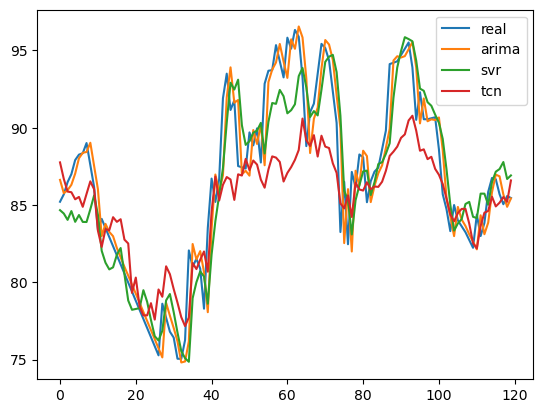

In [5]:
plt.plot(real[:,0], label='real')
plt.plot(arima_pred[:,0], label='arima')
plt.plot(svr_pred[:,0], label='svr')
plt.plot(tcn_pred[:,0], label='tcn')
plt.legend()

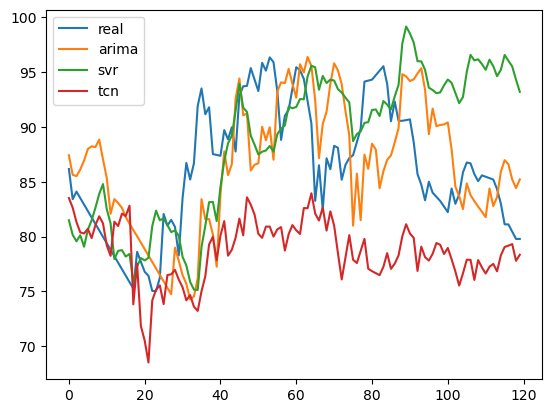

In [6]:
plt.plot(real[:,-1], label='real')
plt.plot(arima_pred[:,-1], label='arima')
plt.plot(svr_pred[:,-1], label='svr')
plt.plot(tcn_pred[:,-1], label='tcn')
plt.legend()

In [7]:
show_performance('arima', arima_pred, real, False)

performance of arima
col 0: RMSE=1.99, MAPE=1.64%
col 1: RMSE=2.72, MAPE=2.36%
col 2: RMSE=3.46, MAPE=3.10%
col 3: RMSE=3.97, MAPE=3.68%
col 4: RMSE=4.36, MAPE=3.94%
col 5: RMSE=4.65, MAPE=4.23%
col 6: RMSE=4.96, MAPE=4.62%
col 7: RMSE=5.28, MAPE=5.03%
col 8: RMSE=5.57, MAPE=5.44%
col 9: RMSE=5.95, MAPE=5.89%


In [8]:
ensemble_pred = (arima_pred + svr_pred + tcn_pred)/3
show_performance('ensemble', ensemble_pred, real, False)

performance of ensemble
col 0: RMSE=2.16, MAPE=1.93%
col 1: RMSE=2.81, MAPE=2.43%
col 2: RMSE=3.35, MAPE=2.98%
col 3: RMSE=3.78, MAPE=3.35%
col 4: RMSE=4.18, MAPE=3.60%
col 5: RMSE=4.50, MAPE=3.79%
col 6: RMSE=4.91, MAPE=4.16%
col 7: RMSE=5.17, MAPE=4.51%
col 8: RMSE=5.38, MAPE=4.74%
col 9: RMSE=5.61, MAPE=4.98%


In [9]:
ensemble_pred2 = (0.5*arima_pred + 0.3*svr_pred + 0.2*tcn_pred)
show_performance('ensemble', ensemble_pred2, real, False)

performance of ensemble
col 0: RMSE=2.01, MAPE=1.78%
col 1: RMSE=2.68, MAPE=2.32%
col 2: RMSE=3.27, MAPE=2.93%
col 3: RMSE=3.70, MAPE=3.35%
col 4: RMSE=4.08, MAPE=3.65%
col 5: RMSE=4.36, MAPE=3.79%
col 6: RMSE=4.70, MAPE=4.11%
col 7: RMSE=4.99, MAPE=4.49%
col 8: RMSE=5.23, MAPE=4.79%
col 9: RMSE=5.52, MAPE=5.08%


## 6.1 CHN Data Description

In [3]:
from Preprocess import *

# orig data (no interpolation)
df_chn1 = pd.read_excel('data/df_chn.xlsx', sheet_name='df-chn')
df_chn1 = df_chn1[ df_chn1['Date'] >= pd.to_datetime('20170605') ]
df_chn1.info()
df_chn1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 132 to 1455
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      1324 non-null   int64         
 1   Date            1324 non-null   datetime64[ns]
 2   Guangzhou       896 non-null    float64       
 3   Hubei           899 non-null    float64       
 4   Shanghai        631 non-null    float64       
 5   Beijing         498 non-null    float64       
 6   Fujian          525 non-null    float64       
 7   Chongqing       454 non-null    float64       
 8   Tianjin         244 non-null    float64       
 9   Shenzhen        886 non-null    float64       
 10  EU-CC           1291 non-null   float64       
 11  WTI-Oil         1299 non-null   float64       
 12  Brent-Oil       1298 non-null   float64       
 13  Zhengzhou-Coal  1306 non-null   float64       
 14  Dalian-Coal     1307 non-null   float64       
 15  Rt

,Unnamed: 0,Guangzhou,Hubei,Shanghai,Beijing,Fujian,Chongqing,Tianjin,Shenzhen,EU-CC,...,Brent-Oil,Zhengzhou-Coal,Dalian-Coal,Rtd-Coal,US-NatGas,SH-FOil,US-FOil,CSI300,US-DJI,USD-CNY
count,1324.000000,896.000000,899.000000,631.000000,498.000000,525.000000,454.000000,244.000000,886.000000,1291.000000,...,1298.000000,1306.000000,1307.000000,1295.000000,1299.000000,1292.000000,1298.000000,1307.000000,1261.000000,1307.000000
mean,793.500000,35.689121,30.062823,43.828545,72.689016,22.712724,18.009031,24.759344,26.560475,40.001758,...,68.359584,713.959265,1711.513772,115.903475,3.377390,2877.363777,2.133006,4150.480933,28641.440206,6.731050
std,382.350189,25.399885,12.235079,10.459432,23.652993,6.981629,13.750997,7.420893,15.616357,27.826551,...,18.436262,188.998888,677.603205,83.890600,1.564804,778.296805,0.735375,585.065086,4404.854681,0.262643
min,132.000000,1.270000,2.660000,24.750000,10.000000,7.190000,1.200000,8.510000,0.760000,5.160000,...,19.330000,468.200000,963.000000,38.450000,1.552000,1016.000000,0.610400,2964.840000,18591.930000,6.269000
25%,462.750000,14.590000,16.690000,37.285000,53.977500,17.730000,4.600000,19.000000,13.152500,21.060000,...,58.232500,591.800000,1261.500000,59.500000,2.518000,2401.000000,1.788150,3796.360000,25058.120000,6.481000
50%,793.500000,26.580000,28.720000,40.500000,71.055000,21.240000,16.245000,26.000000,25.509000,27.170000,...,67.580000,645.200000,1368.000000,88.600000,2.859000,2850.000000,2.008500,3997.130000,27492.560000,6.749900
75%,1124.250000,45.642500,40.675000,54.875000,87.192500,28.530000,30.812500,30.000000,34.026250,63.385000,...,77.825000,801.400000,2068.750000,132.600000,3.674000,3431.000000,2.351225,4689.760000,33203.930000,6.940600
max,1455.000000,95.600000,61.890000,81.780000,149.640000,63.190000,49.000000,39.800000,67.060000,98.010000,...,127.980000,2301.600000,3995.000000,439.000000,9.647000,5109.000000,5.135400,5807.720000,36799.650000,7.301500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1324 non-null   datetime64[ns]
 1   Guangzhou       1324 non-null   float64       
 2   Hubei           1324 non-null   float64       
 3   Shanghai        1324 non-null   float64       
 4   Beijing         1324 non-null   float64       
 5   Fujian          1324 non-null   float64       
 6   Chongqing       1324 non-null   float64       
 7   Tianjin         1324 non-null   float64       
 8   Shenzhen        1324 non-null   float64       
 9   EU-CC           1324 non-null   float64       
 10  WTI-Oil         1324 non-null   float64       
 11  Brent-Oil       1324 non-null   float64       
 12  Zhengzhou-Coal  1324 non-null   float64       
 13  Dalian-Coal     1324 non-null   float64       
 14  Rtd-Coal        1324 non-null   float64       
 15  US-N

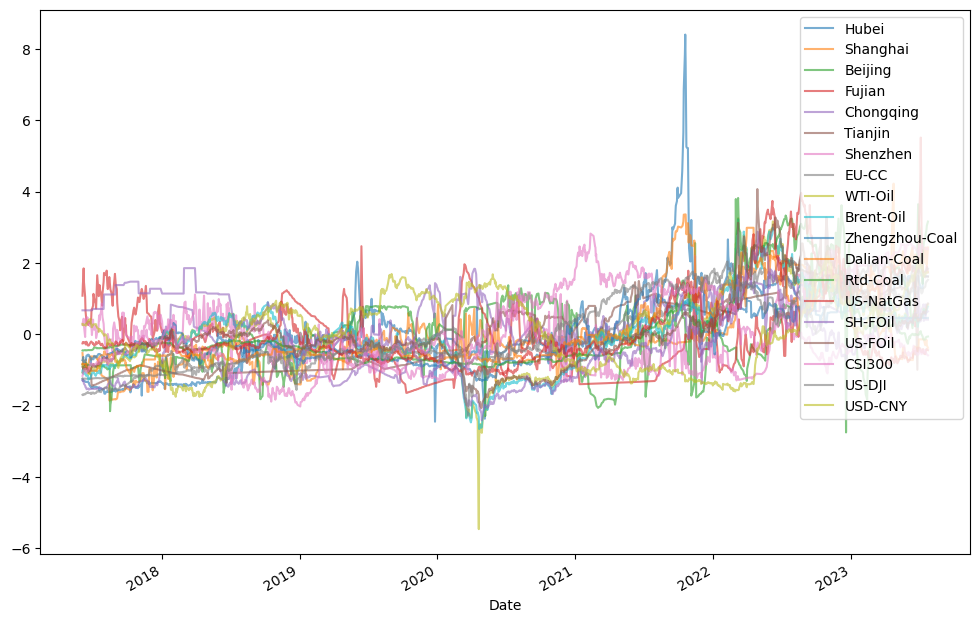

In [4]:
df_chn = prepare_chn(save=False, vis=True)

<AxesSubplot:>

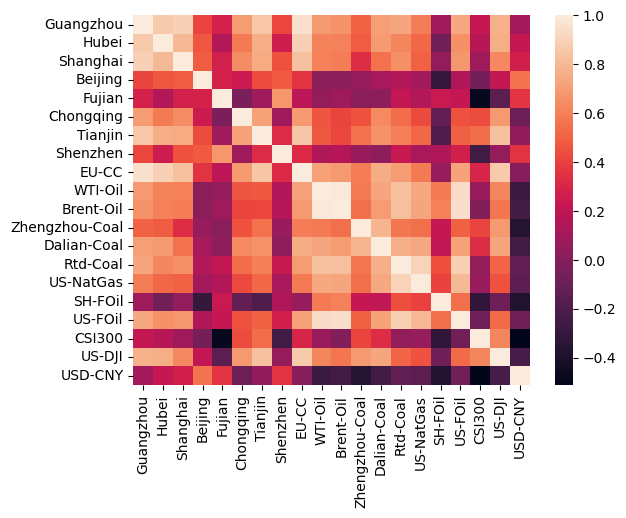

In [5]:
import seaborn as sns
sns.heatmap(df_chn.corr(), annot=False, fmt=".2f")

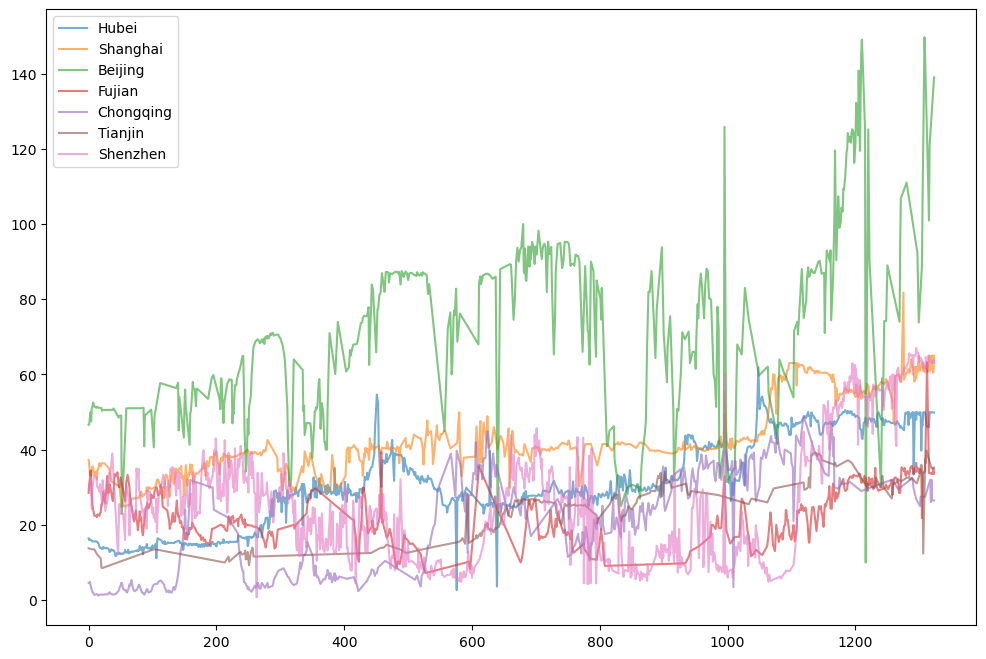

In [6]:
markets = ['Guangzhou', 'Hubei', 'Shanghai', 'Beijing', 'Fujian', 'Chongqing', 'Tianjin', 'Shenzhen']
df_norm = df_chn[markets]
# df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df_norm.iloc[:,1:].plot(figsize=(12,8), x_compat=True, alpha=0.6)
plt.show()

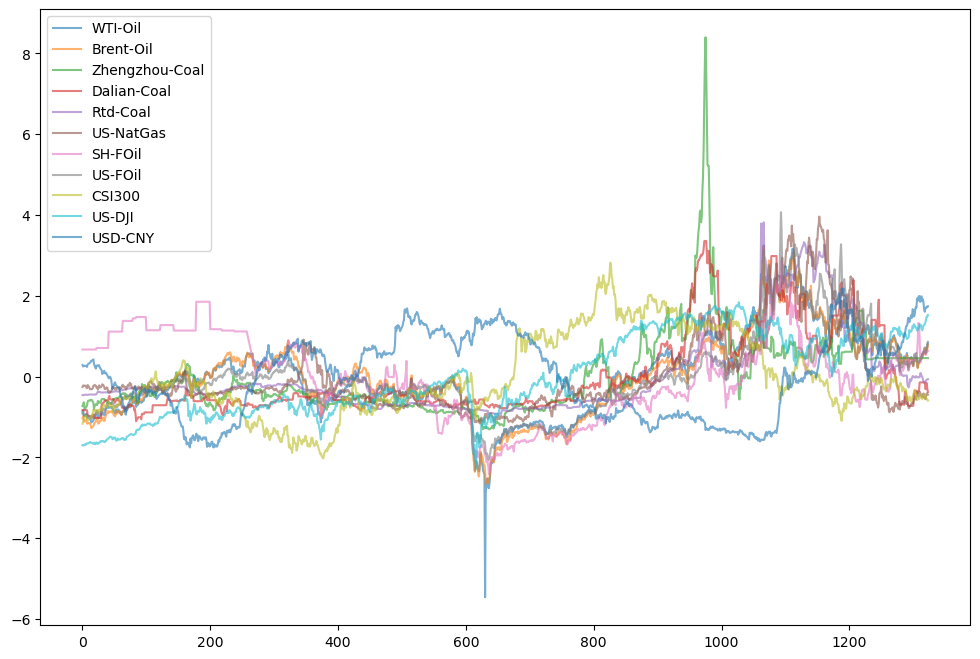

In [7]:
Xcols = ['EU-CC', 'WTI-Oil', 'Brent-Oil', 'Zhengzhou-Coal', 'Dalian-Coal', 'Rtd-Coal', 'US-NatGas', 'SH-FOil', 'US-FOil', 'CSI300', 'US-DJI', 'USD-CNY']
df_norm = df_chn[Xcols]
df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df_norm.iloc[:,1:].plot(figsize=(12,8), x_compat=True, alpha=0.6)
plt.show()

# Post-processing